In [90]:
import pandas as pd
from pandas import read_csv
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

In [91]:
filename = 'glass.csv'
names = ['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe','Type']
dataframe = read_csv(filename, names=names)

In [92]:

array = dataframe.values
X = array[2:215, 0:9]
Y = array[2:215, 9]

In [93]:
X

array([['1.51761', '13.89', '3.6', ..., '7.83', '0', '0'],
       ['1.51618', '13.53', '3.55', ..., '7.78', '0', '0'],
       ['1.51766', '13.21', '3.69', ..., '8.22', '0', '0'],
       ...,
       ['1.52065', '14.36', '0', ..., '8.44', '1.64', '0'],
       ['1.51651', '14.38', '0', ..., '8.48', '1.57', '0'],
       ['1.51711', '14.23', '0', ..., '8.62', '1.67', '0']], dtype=object)

In [94]:
Y

array(['1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '2', '2', '2', '2', '2', '2', '2', '2', '2',
       '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2',
       '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2',
       '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2',
       '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2',
       '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2',
       '2', '2', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3',
       '3', '3', '3', '3', '3', '3', '5', '5', '5', '5', '5', '5', '5',
       '5', '5', '5', '5', '5', '5', '6', '6', '6', '6', '6', '6

In [95]:
num_folds = 20
kfold = KFold(n_splits=20)

In [96]:
model = KNeighborsClassifier(n_neighbors=15)
results = cross_val_score(model, X, Y, cv=kfold)

In [97]:
print(results.mean())

0.5513636363636364


In [98]:
model = KNeighborsClassifier(n_neighbors=5)
results = cross_val_score(model, X, Y, cv=kfold)

In [99]:
print(results.mean())

0.5286363636363637


In [100]:
model = KNeighborsClassifier(n_neighbors=2)
results = cross_val_score(model, X, Y, cv=kfold)

In [101]:
print(results.mean())

0.5495454545454546


In [102]:
model = KNeighborsClassifier(n_neighbors=1)
results = cross_val_score(model, X, Y, cv=kfold)

In [103]:
print(results.mean())

0.5790909090909091


In [104]:
# n_neighbors=1 gives the best result.

In [105]:
#grid search

In [106]:
import numpy
from pandas import read_csv
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [107]:
n_neighbors = numpy.array(range(1,40))
param_grid = dict(n_neighbors=n_neighbors)

In [108]:
model = KNeighborsClassifier()
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid.fit(X, Y)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39])})

In [109]:
print(grid.best_score_)
print(grid.best_params_)

0.6436323366555925
{'n_neighbors': 1}


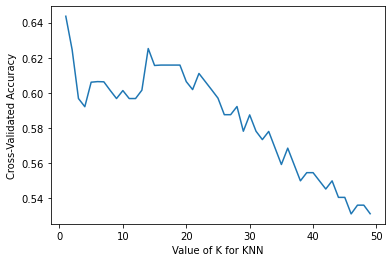

In [110]:
import matplotlib.pyplot as plt 
%matplotlib inline
# choose k between 1 to 50
k_range = range(1, 50)
k_scores = []
# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, Y, cv=5)
    k_scores.append(scores.mean())
# plot to see clearly
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()